Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Merle\PycharmProjects\DataScienceCancerDataset\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'rf__max_depth': None, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}
R^2 Score on Test Data: 0.8999930248973512


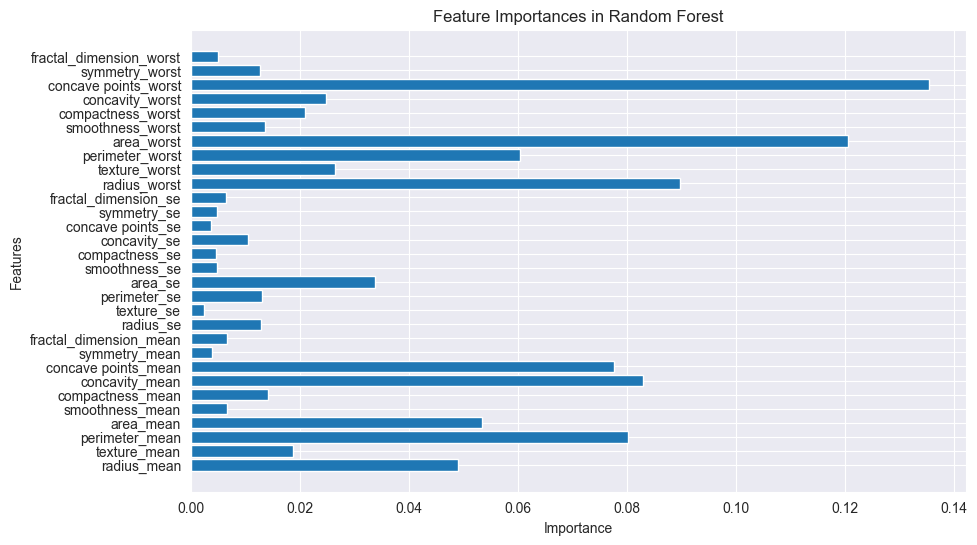

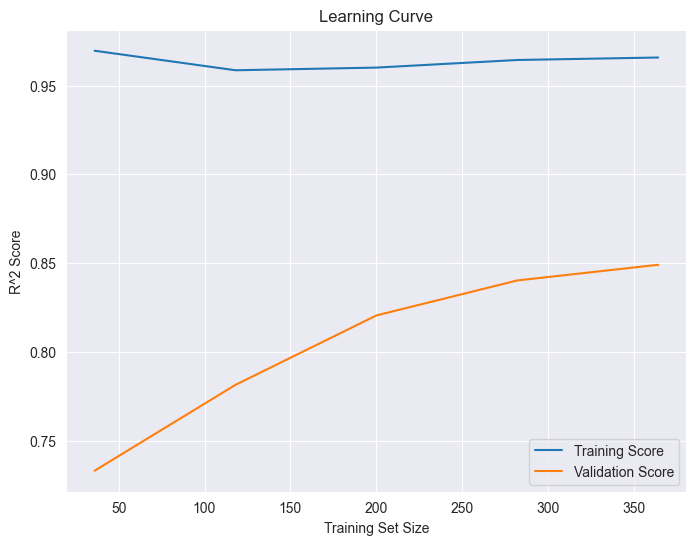

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import joblib

# Load data from CSV
file_path = "cleaned_dataset.csv"  # Replace with your actual CSV file path
df = pd.read_csv(file_path)

# Rename and encode the target variable
df.rename(columns={"diagnosis": "target"}, inplace=True)
df['target'] = df['target'].map({'M': 0, 'B': 1})  # M: malignant, B: benign

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2', None]  
}


# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score on Test Data: {r2}")

# Feature Importances
rf = best_model.named_steps['rf']
feature_importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, align="center")
plt.title("Feature Importances in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Validation Score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("R^2 Score")
plt.legend()
plt.grid(True)
plt.show()
